# 3er Parcial

In [4]:
# Importar las librerías
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import os
import mne
from scipy.signal import coherence, hilbert

In [ ]:
def abrir_archivos(path_carpeta):
    

In [10]:
# Leer los archivos de los ensayos 3 y 4
ensayo3_excel = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementinmagery\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementinmagery\eeg-motor-movementimagery_Ensayo_04.xlsx"
# Leer el archivo de las coordenadas
eeg_coords_csv = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"
eeg_coords = pd.read_csv(eeg_coords_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

In [13]:
# Convertir a diccionarios
ensayo3_dict= pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0) 
ensayo4_dict= pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0) 
ensayos_dfs = []
for sujeto in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujeto])
stack = np.stack([df.values for df in ensayos_dfs])
stack.shape

(109, 64, 64)

In [15]:
threshold = 0.5
porcentaje = 0.60
stack = np.stack([df.values for df in ensayos_dfs])
above = stack > threshold
N = len(ensayos_dfs)
count_above = above.sum(axis=0)
min_requerido = int(np.ceil(porcentaje*N)) 

<Axes: >

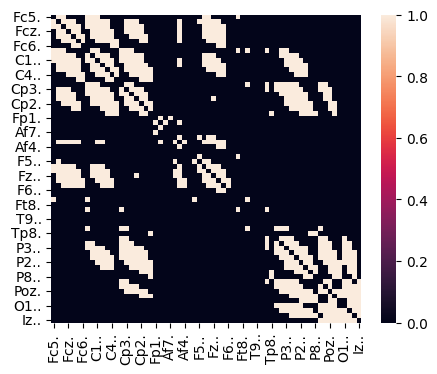

In [16]:
result_bool = count_above >= min_requerido
result_df = pd.DataFrame(result_bool,
                         index=ensayos_dfs[0].index,
                         columns=ensayos_dfs[0].columns).astype(int)
plt.figure(figsize=(5,4))
sns.heatmap(result_df)

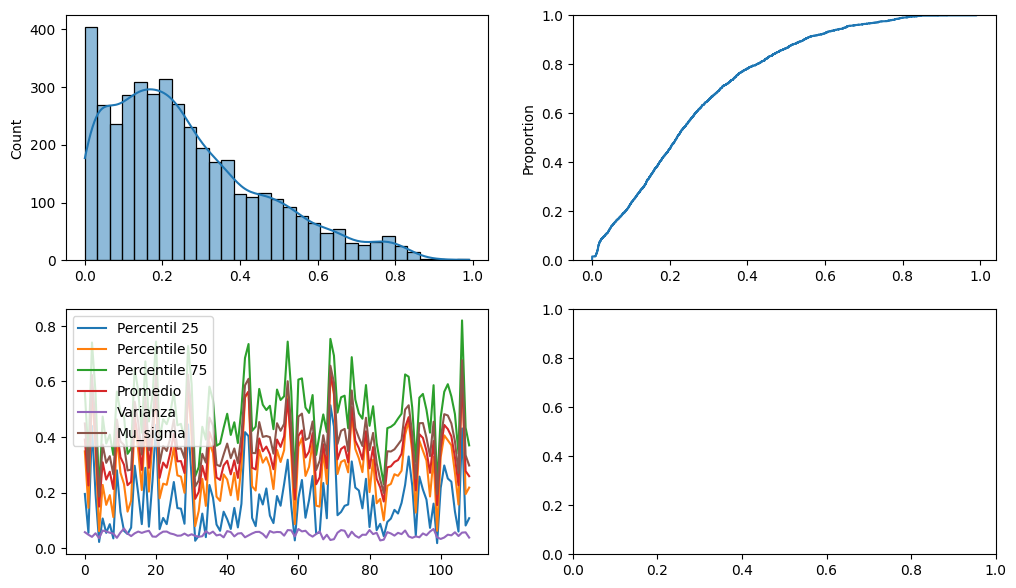

In [22]:
# medidas de tendencia central y otras
th25, th50, th75,  promedio, varianza = [], [], [], [], []
mu_sigma= []
fig, axes = plt.subplots(2, 2, figsize=(12,7))
for sujeto in ensayos_dfs:
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data)+np.var(data))
    
sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil 25')
axes[1][0].plot(th50, label='Percentile 50')
axes[1][0].plot(th75, label='Percentile 75')
axes[1][0].plot(promedio, label='Promedio')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='Mu_sigma')
axes[1][0].legend()

In [27]:
from scipy.stats import median_abs_deviation

In [34]:
estadisticos_df= pd.DataFrame(columns=['th75','th50','th25','promedio','mu_sigma'])
columnas= [th25, th50, th75, promedio, mu_sigma]
estadisticos_df.loc[0]= [np.min(th75),np.min(th50),np.min(th25),np.min(promedio),np.min(mu_sigma)]
estadisticos_df.loc[1]= [np.max(th75),np.max(th50),np.max(th25),np.max(promedio),np.max(mu_sigma)]
estadisticos_df.loc[2]= [np.median(th75),np.median(th50),np.median(th25),np.median(promedio),np.median(mu_sigma)]
estadisticos_df

,th75,th50,th25,promedio,mu_sigma
0,0.196867,0.061750,0.018413,0.149821,0.186222
1,0.819681,0.674805,0.514472,0.626848,0.676548
2,0.484181,0.273808,0.144574,0.327700,0.389466
